In [5]:
# Task 3: Predictive Analytics for Resource Allocation
# Breast Cancer Dataset
# Author: [Your Name]

# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# 2. Load Dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 3. Map target to priority labels
# 0 = malignant → High Priority
# 1 = benign → Low Priority
y_labels = y.map({0: 'High', 1: 'Low'})

# 4. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.2, random_state=42)

# 5. Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Predict
y_pred = model.predict(X_test)

# 7. Evaluate
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label='High', average='binary')

# 8. Print Results
print("----- Performance Metrics -----")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


----- Performance Metrics -----
Accuracy: 0.9649
F1 Score: 0.9524

Classification Report:
              precision    recall  f1-score   support

        High       0.98      0.93      0.95        43
         Low       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



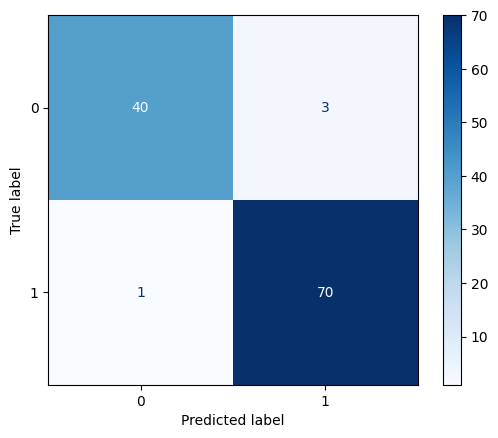

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test data
y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()


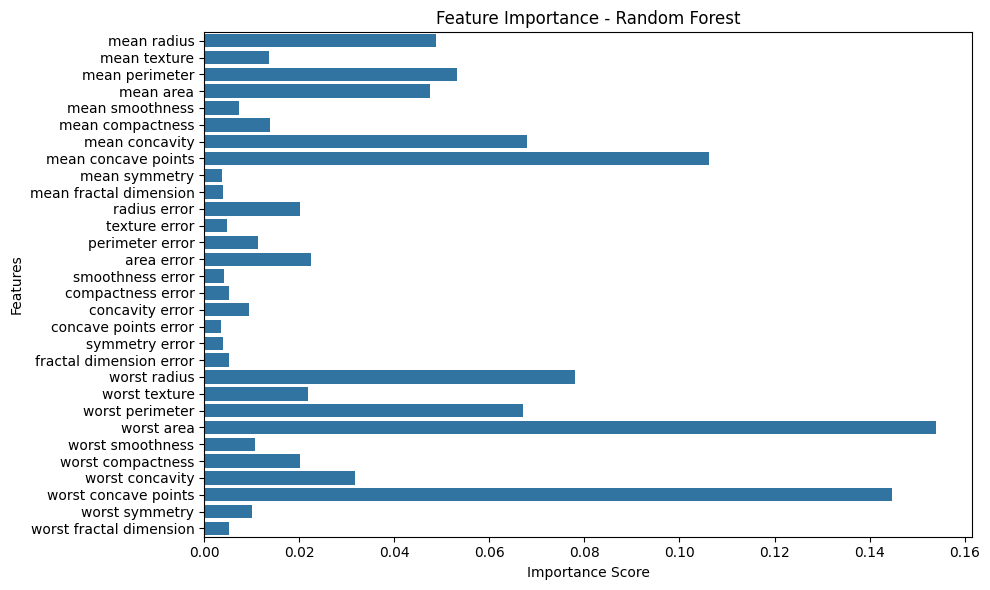

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
